<a href="https://colab.research.google.com/github/Wapikkk/BDC-Gelombang-2/blob/main/ML_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deskripsi Dataset**
https://www.kaggle.com/discussions/accomplishments/494990

Dataset diatas berisi data faktor emisi Gas Rumah Kaca (GRK) yang dihubungkan dengan kategori rantai pasokan berdasarkan kode NAICS (North American Industry Classification System) dalam satuan CO₂e per dolar AS (USD) tahun 2021.

**Deskripsi Kolom**
1. NAICS Code = Kode industri perusahaan terkait.
2. NAICS Title = Nama dari industri perushaan.
3. GHG = Jenis dari gas rumah kaca yang diukur.
4. Unit = Satuan faktor emisi KgCO2e / 2021 USD (kilogram CO₂ ekuivalen per dolar AS tahun 2021).
5. Supply Chain Emission Factors without Margins =
6. Margins of Supply Chain Emission Factors =
7. Supply Chain Emission Factors with Margins =
8. Reference USEEIO Code =

## **Install Packages**

In [1]:
!pip install requests

# **Import Library**

In [2]:
# manipulasi data
import numpy as np
import pandas as pd

# visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# pengukuran
import math

# pre-processing data
from sklearn.model_selection import train_test_split

# **Show Data**

In [3]:
file_path = "/content/SupplyChainGHGEmissionFactors_v1.2_NAICS_CO2e_USD2021.csv"
df = pd.read_csv(file_path, encoding = "utf-8")

df.head(15)

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",1.223,0.103,1.326,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",1.223,0.103,1.326,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
5,111160,Rice Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
6,111191,Oilseed and Grain Combination Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
7,111199,All Other Grain Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
8,111211,Potato Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",0.511,0.077,0.588,111200
9,111219,Other Vegetable (except Potato) and Melon Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",0.511,0.077,0.588,111200


# **Exprolatory Data Analysis (EDA)**

In [4]:
# informasi dataset
df.info()

df.shape
# (jumlah baris, jumlah kolom)

# informasi tipe data
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   2017 NAICS Code                                1016 non-null   int64  
 1   2017 NAICS Title                               1016 non-null   object 
 2   GHG                                            1016 non-null   object 
 3   Unit                                           1016 non-null   object 
 4   Supply Chain Emission Factors without Margins  1016 non-null   float64
 5   Margins of Supply Chain Emission Factors       1016 non-null   float64
 6   Supply Chain Emission Factors with Margins     1016 non-null   float64
 7   Reference USEEIO Code                          1016 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 63.6+ KB


,0
2017 NAICS Code,int64
2017 NAICS Title,object
GHG,object
Unit,object
Supply Chain Emission Factors without Margins,float64
Margins of Supply Chain Emission Factors,float64
Supply Chain Emission Factors with Margins,float64
Reference USEEIO Code,object


In [5]:
# info dataset yang ter duplikasi
df.duplicated().sum()

# jika 0 = maka tidak ada yang ter duplikasi
# jika > 0 maka ada data yang ter duplikasi

np.int64(0)

In [6]:
# menampilkan kolom dan baris dari dataframe (df) yang tidak diperlukan
df_sectoral = df [["GHG", "Unit", "Margins of Supply Chain Emission Factors",
                   "Reference USEEIO Code"]].copy()
df_sectoral.head(10)

,GHG,Unit,Margins of Supply Chain Emission Factors,Reference USEEIO Code
0,All GHGs,"kg CO2e/2021 USD, purchaser price",0.103,1111A0
1,All GHGs,"kg CO2e/2021 USD, purchaser price",0.103,1111A0
2,All GHGs,"kg CO2e/2021 USD, purchaser price",0.134,1111B0
3,All GHGs,"kg CO2e/2021 USD, purchaser price",0.134,1111B0
4,All GHGs,"kg CO2e/2021 USD, purchaser price",0.134,1111B0
5,All GHGs,"kg CO2e/2021 USD, purchaser price",0.134,1111B0
6,All GHGs,"kg CO2e/2021 USD, purchaser price",0.134,1111B0
7,All GHGs,"kg CO2e/2021 USD, purchaser price",0.134,1111B0
8,All GHGs,"kg CO2e/2021 USD, purchaser price",0.077,111200
9,All GHGs,"kg CO2e/2021 USD, purchaser price",0.077,111200


In [7]:
# menghapus kolom dan baris dari dataframe yang tidak digunakan
df_cleaned = df.drop(columns=["GHG", "Unit", "Margins of Supply Chain Emission Factors", "Reference USEEIO Code" ], errors='ignore')

# menampilkan dataframe yang digunakan
# df_sectoral = df_cleaned[["2017 NAICS Code", "2017 NAICS Title", "Supply Chain Emission Factors without Margins",
#                            "Supply Chain Emission Factors with Margins"]].copy()

df_cleaned.head(10)

,2017 NAICS Code,2017 NAICS Title,Supply Chain Emission Factors without Margins,Supply Chain Emission Factors with Margins
0,111110,Soybean Farming,1.223,1.326
1,111120,Oilseed (except Soybean) Farming,1.223,1.326
2,111130,Dry Pea and Bean Farming,2.874,3.007
3,111140,Wheat Farming,2.874,3.007
4,111150,Corn Farming,2.874,3.007
5,111160,Rice Farming,2.874,3.007
6,111191,Oilseed and Grain Combination Farming,2.874,3.007
7,111199,All Other Grain Farming,2.874,3.007
8,111211,Potato Farming,0.511,0.588
9,111219,Other Vegetable (except Potato) and Melon Farming,0.511,0.588


# **Cek Missing Value**

In [8]:
# cek missing value
df_cleaned.isnull().sum()

,0
2017 NAICS Code,0
2017 NAICS Title,0
Supply Chain Emission Factors without Margins,0
Supply Chain Emission Factors with Margins,0


# **Detect and Handle Outlier**



In [9]:
df_cleaned.describe()

,2017 NAICS Code,Supply Chain Emission Factors without Margins,Supply Chain Emission Factors with Margins
count,1016.000000,1016.00000,1016.000000
mean,424917.376969,0.35787,0.386014
std,164942.113495,0.55562,0.569845
min,111110.000000,0.01300,0.013000
25%,325588.250000,0.12300,0.128750
50%,423700.000000,0.18700,0.208000
75%,532111.250000,0.40150,0.448250
max,813990.000000,10.98900,10.989000


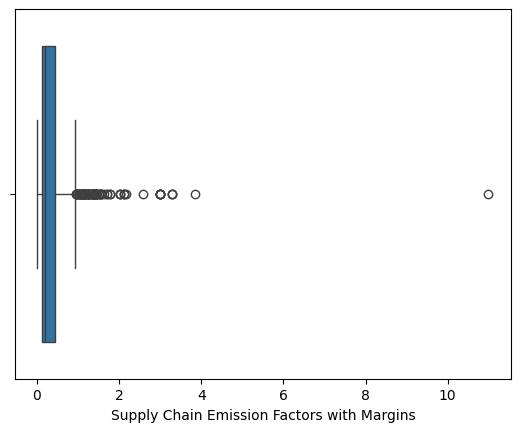

In [10]:
# Visualisasi Outlier
sns.boxplot(data=df_cleaned, x='Supply Chain Emission Factors with Margins')

# tampilkan boxplot
plt.show()